# Visualization of the deggresive claiming process

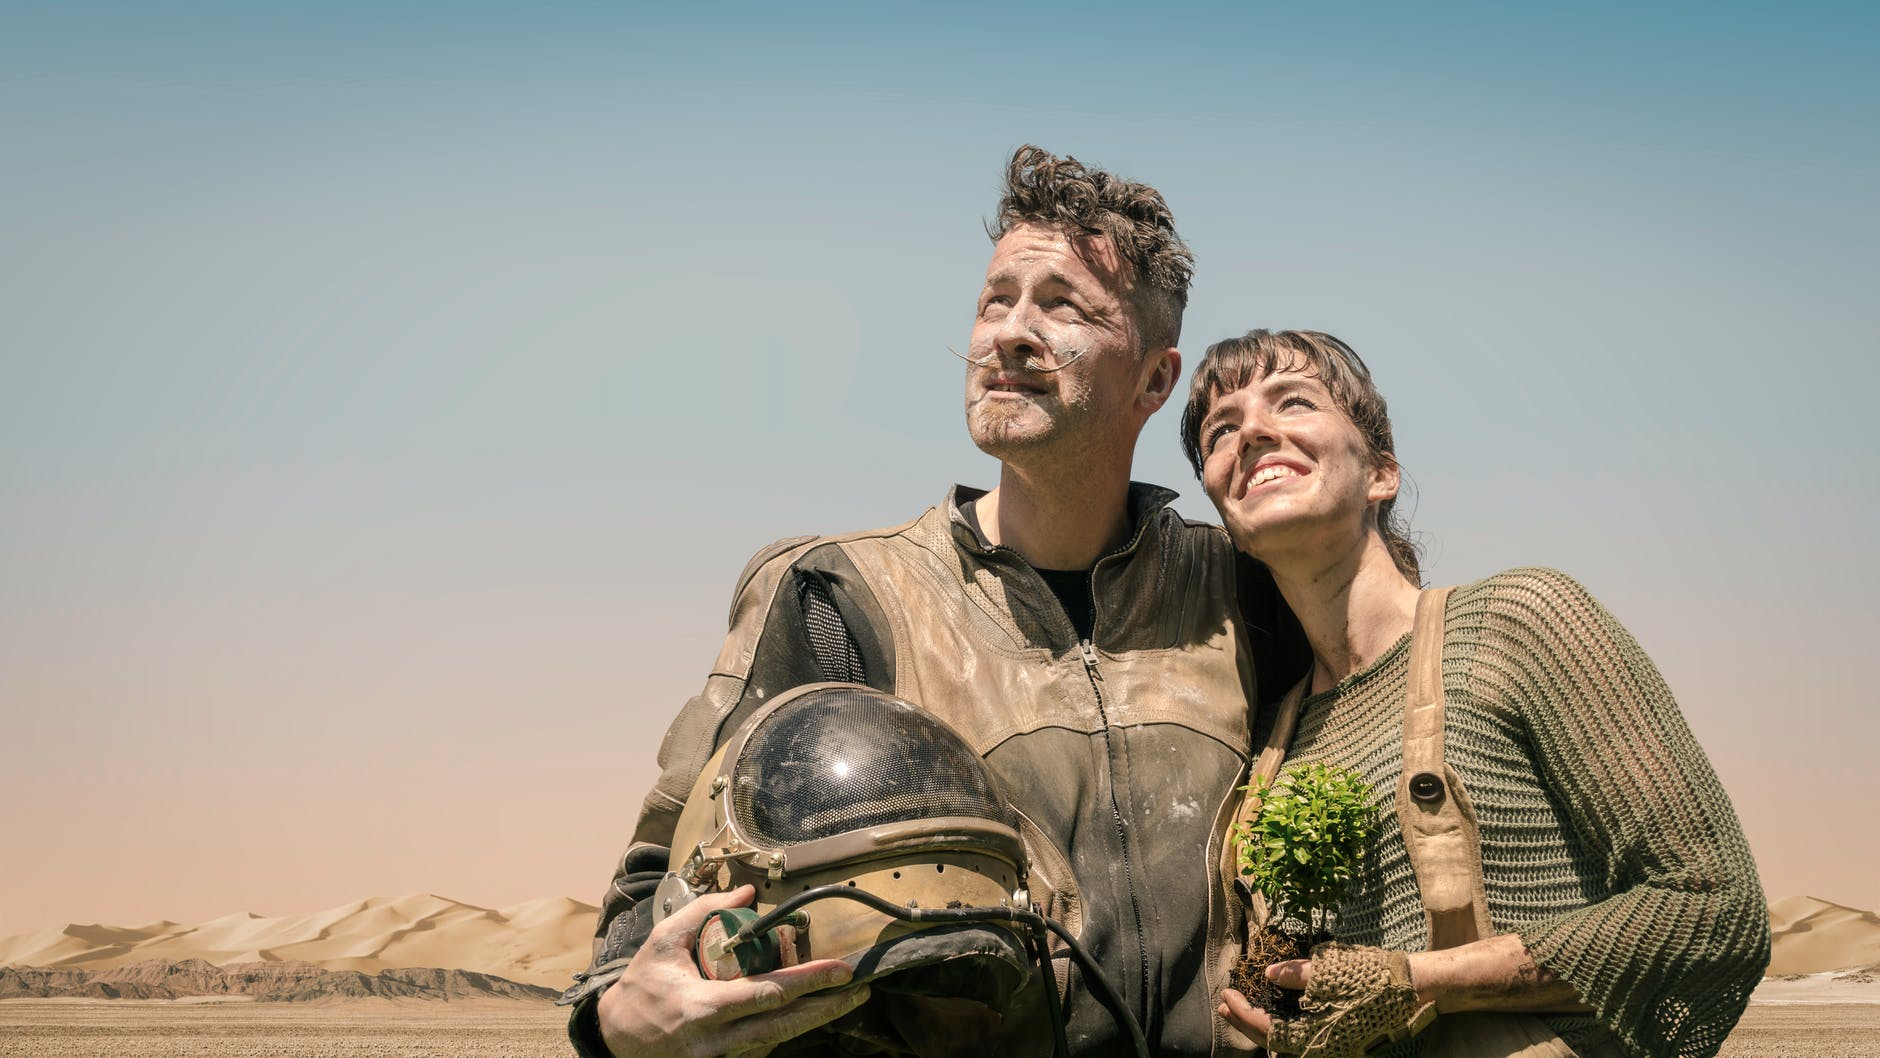

In [1]:
from IPython.display import Image
from tools import * 
Image("../future.jpeg")

# Schedule alterations

In [2]:
N = 60000

### Version 1: No deggression

Last claim amount: 60


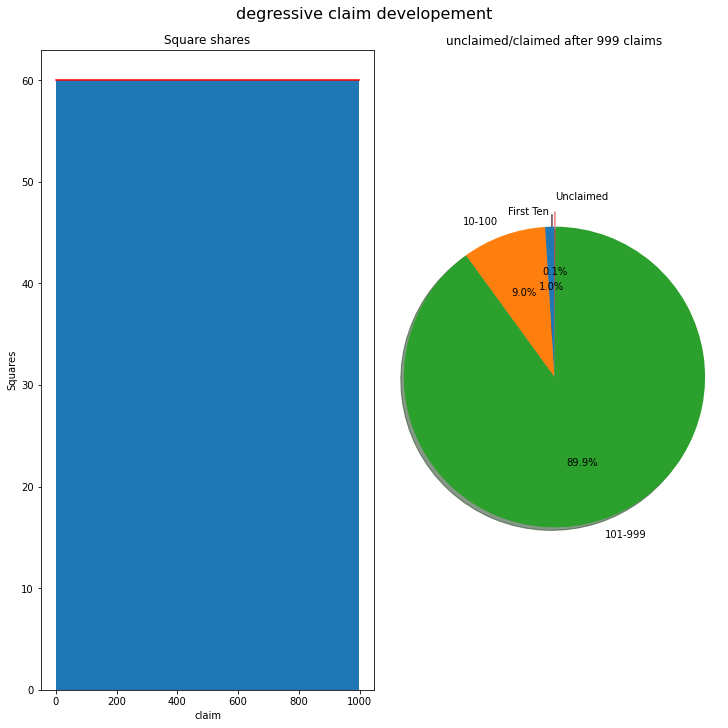

In [3]:
plot_developement(N, first_claim = 60, deg= 1, nClaims= 999)

### Version 2: Simple degression

All squares distributed before the max claims were reached!
Last claim: 1533
Last claim amount: 9.998576254365483


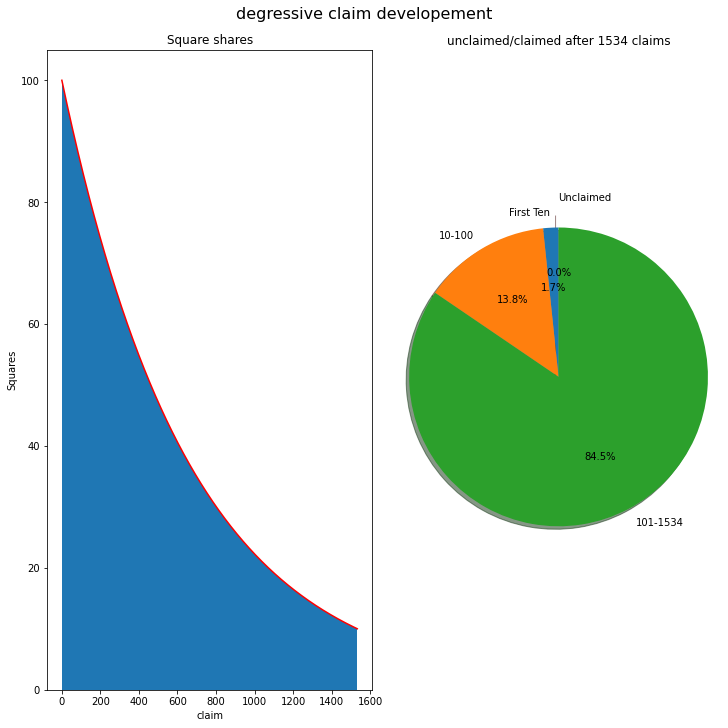

In [4]:
plot_developement(N, first_claim = 100, deg= 0.9985, nClaims= 2000)

### Version 3: Harter Cut

All squares distributed before the max claims were reached!
Last claim: 1997
Last claim amount: 10


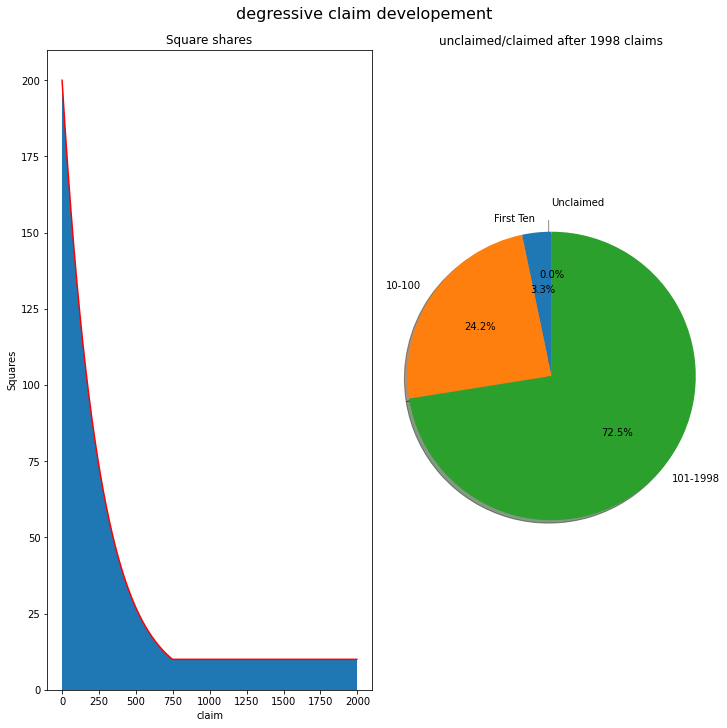

In [5]:
plot_developement(N, first_claim = 200, deg= 0.996, nClaims= 2000, minimum_claim = 10)

### Version 4: Stepwise 

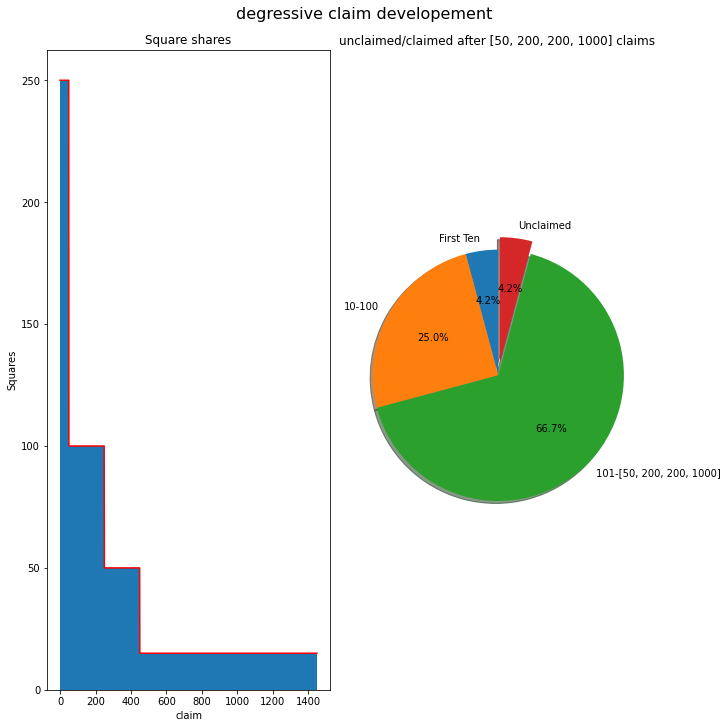

In [17]:
plot_developement_steps(N, levels = [250,100,50,15],  nClaims=[50,200,200,1000])